# Set up Environment


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import gdown

# Set Up Dataset

In [ ]:
# URL file Google Drive
file_id = "1oZ7ISWLvmQX4mu4PNjsD8naEisjLQVhO"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

# Download file
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1oZ7ISWLvmQX4mu4PNjsD8naEisjLQVhO
To: /content/data.csv
100%|██████████| 121k/121k [00:00<00:00, 52.3MB/s]


'data.csv'

In [ ]:
# Retrieve dataset
df = pd.read_csv('data.csv')
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
# Replace 'B' with 0 and 'M' with 1 in the 'diagnosis' column
df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})

# Display the updated DataFrame to verify the changes
print(df.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

<ipython-input-6-cb0b0fbd3071>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})


## Data Pre-processing

In [ ]:
# Calculate the correlation between all columns and the 'Diagnosis' column
correlation_with_diagnosis = df.corr()['Diagnosis']

# Print the correlation values
correlation_with_diagnosis

,Diagnosis
radius1,0.730029
texture1,0.415185
perimeter1,0.742636
area1,0.708984
smoothness1,0.358560
compactness1,0.596534
concavity1,0.696360
concave_points1,0.776614
symmetry1,0.330499
fractal_dimension1,-0.012838


In [ ]:
# Create a copy of the DataFrame for feature selection
df_final = df.copy()
# Find columns with correlation to 'Diagnosis' between -0.6 and 0 or 0.6 and 0
columns_to_drop = correlation_with_diagnosis[
    ((correlation_with_diagnosis > -0.6) & (correlation_with_diagnosis < 0)) |
    ((correlation_with_diagnosis < 0.6) & (correlation_with_diagnosis > 0))
].index

# Drop the identified columns
df_final.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(df_final.head())

   radius1  perimeter1   area1  concavity1  concave_points1  radius3  \
0    17.99      122.80  1001.0      0.3001          0.14710    25.38   
1    20.57      132.90  1326.0      0.0869          0.07017    24.99   
2    19.69      130.00  1203.0      0.1974          0.12790    23.57   
3    11.42       77.58   386.1      0.2414          0.10520    14.91   
4    20.29      135.10  1297.0      0.1980          0.10430    22.54   

   perimeter3   area3  concavity3  concave_points3  Diagnosis  
0      184.60  2019.0      0.7119           0.2654          1  
1      158.80  1956.0      0.2416           0.1860          1  
2      152.50  1709.0      0.4504           0.2430          1  
3       98.87   567.7      0.6869           0.2575          1  
4      152.20  1575.0      0.4000           0.1625          1  


In [ ]:
# Calculate the correlation between all columns and the 'Diagnosis' column
correlation_with_diagnosis = df_final.corr()['Diagnosis']

# Print the correlation values
correlation_with_diagnosis

,Diagnosis
radius1,0.730029
perimeter1,0.742636
area1,0.708984
concavity1,0.696360
concave_points1,0.776614
radius3,0.776454
perimeter3,0.782914
area3,0.733825
concavity3,0.659610
concave_points3,0.793566


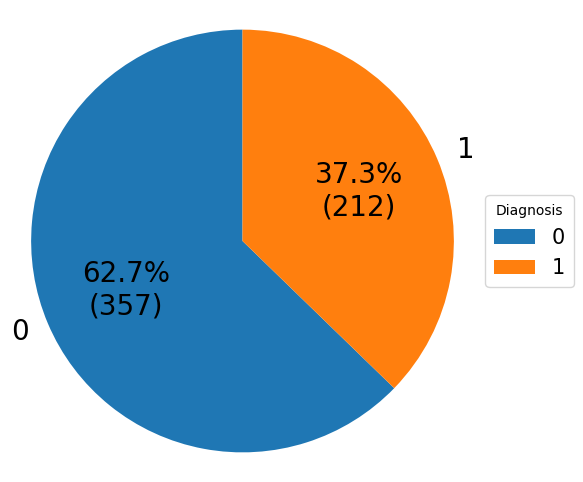

In [ ]:
# calculated class distribution
class_counts = df['Diagnosis'].value_counts()

# function to display percentage and amount
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f"{pct:.1f}%\n({absolute})"

# creating pie charts
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct=lambda pct: func(pct, class_counts),
    textprops=dict(color="black", fontsize=20),
    startangle=90
)

# create writing in pie charts
for autotext in autotexts:
    autotext.set_fontsize(20)

# added legend
plt.legend(wedges, class_counts.index, title="Diagnosis", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 15})

plt.axis('equal')  # Keep the ratio so that the pie chart is a perfect circle
plt.show()

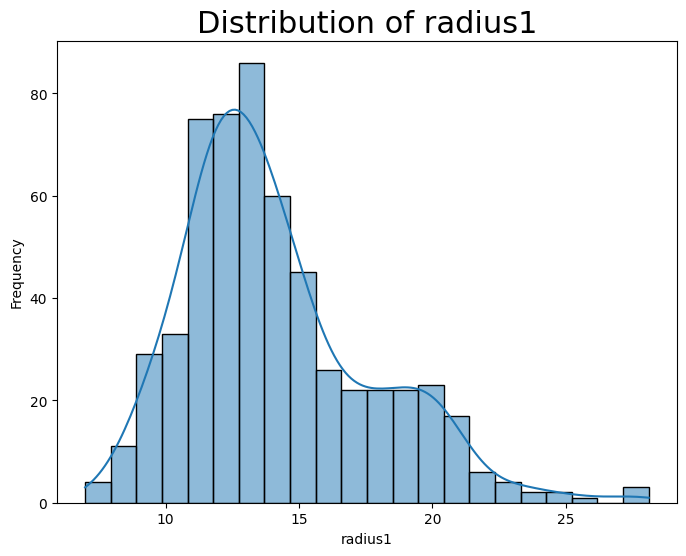

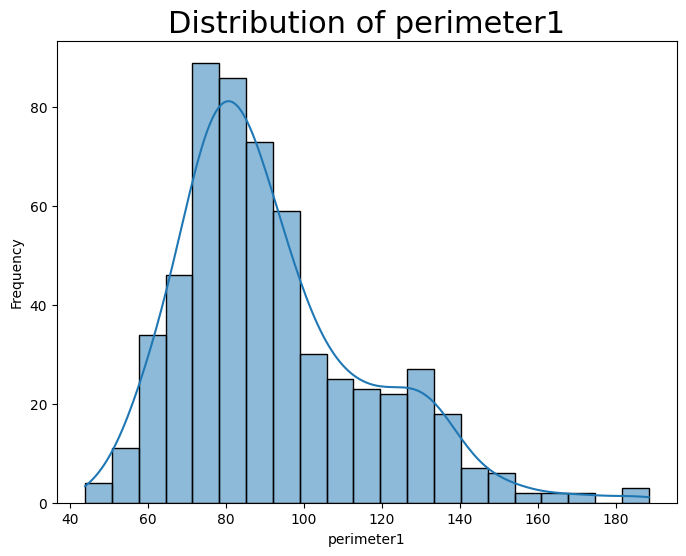

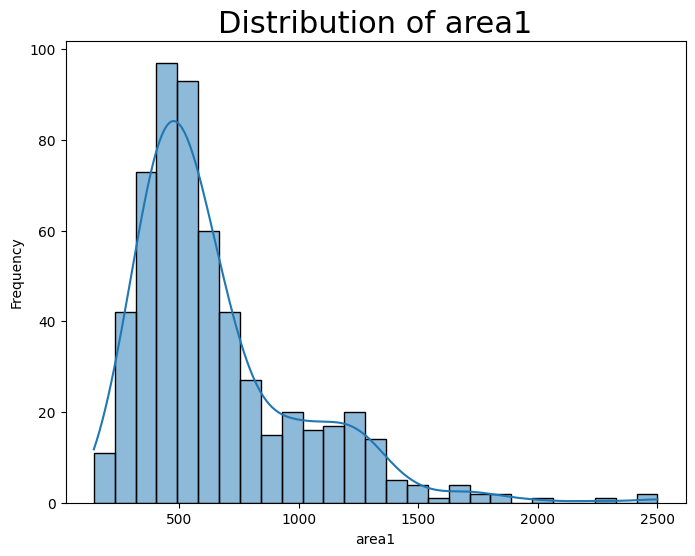

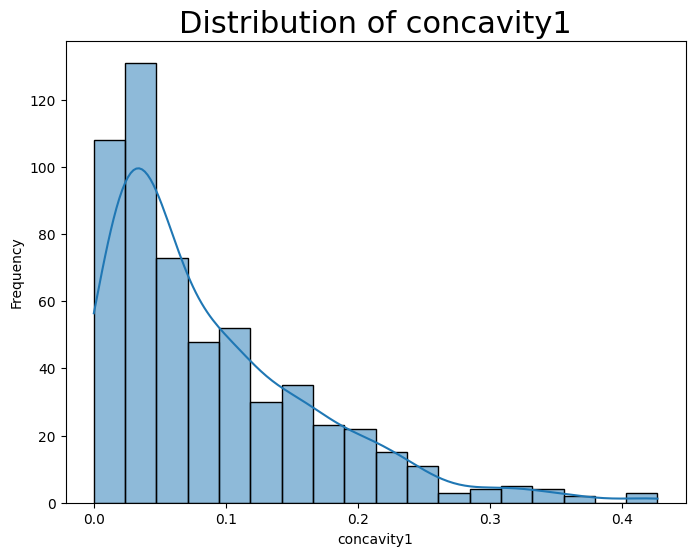

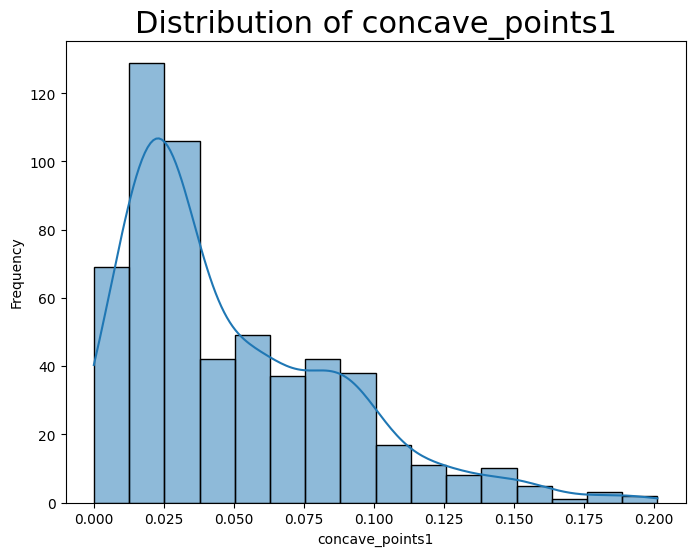

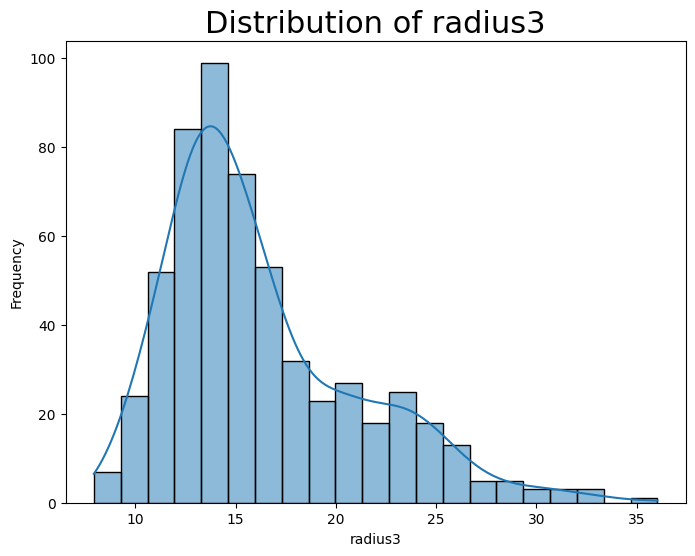

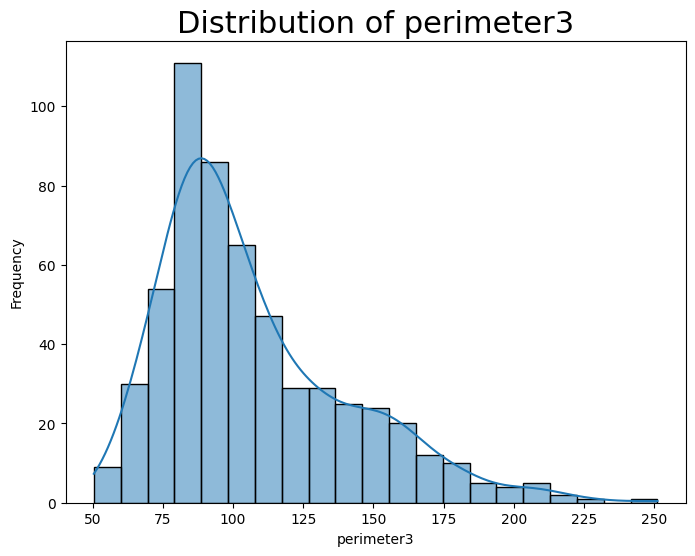

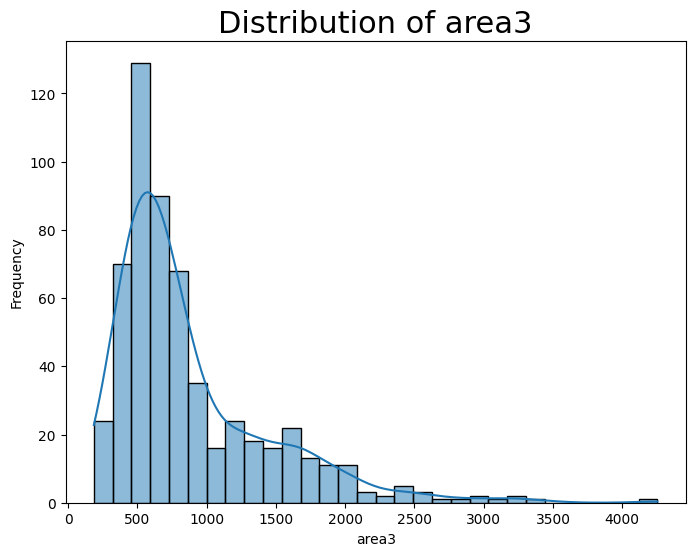

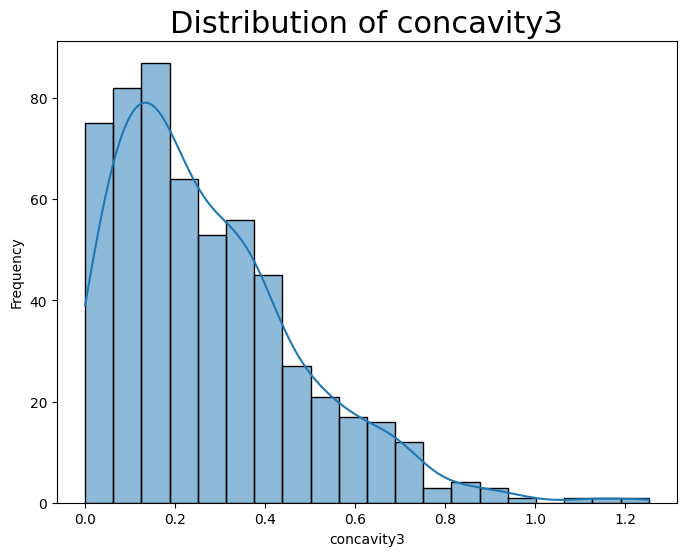

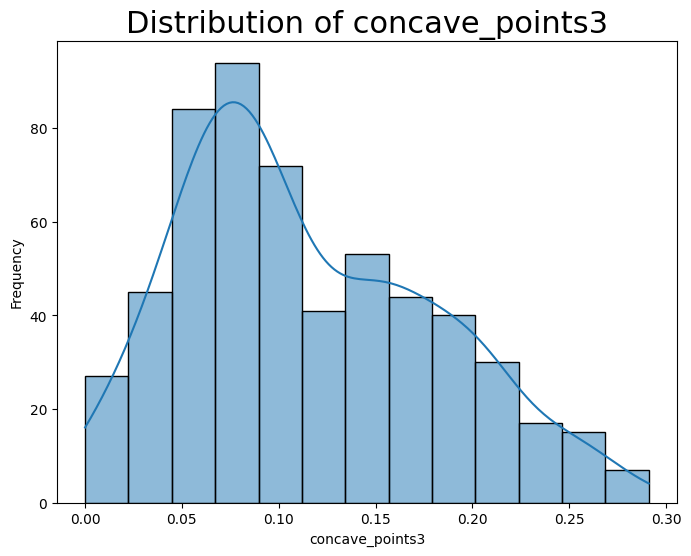

In [ ]:
# Plotting histograms for each column except 'Diagnosis'
for column in df_final.columns:
    if column != 'Diagnosis':
        plt.figure(figsize=(8, 6))
        sns.histplot(df_final[column], kde=True)  # Added KDE for better visualization
        plt.title(f'Distribution of {column}', fontsize=22)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

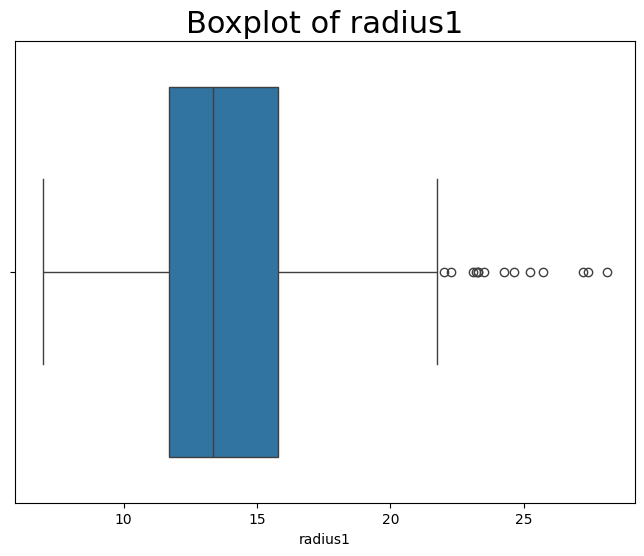

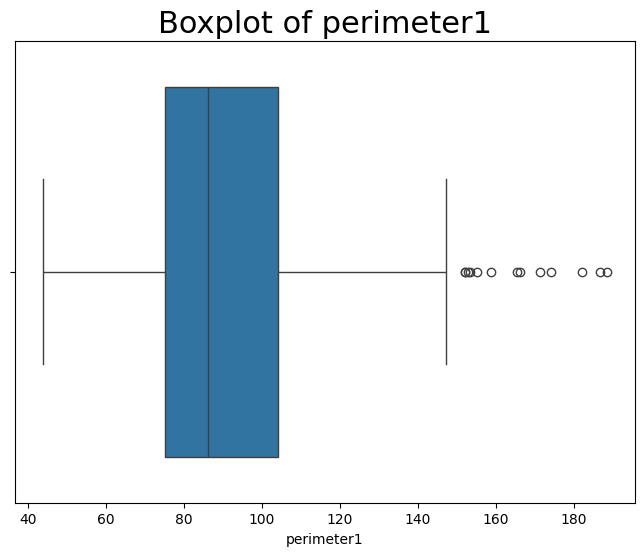

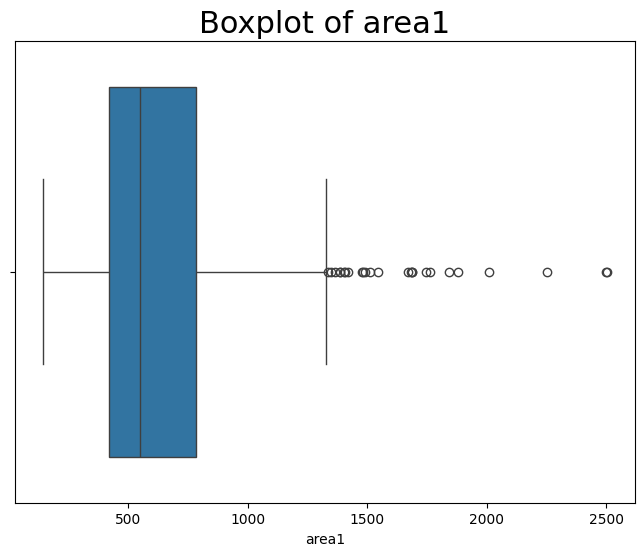

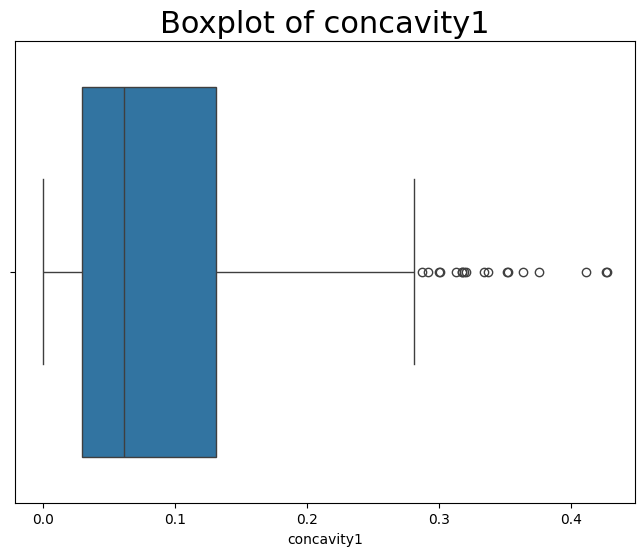

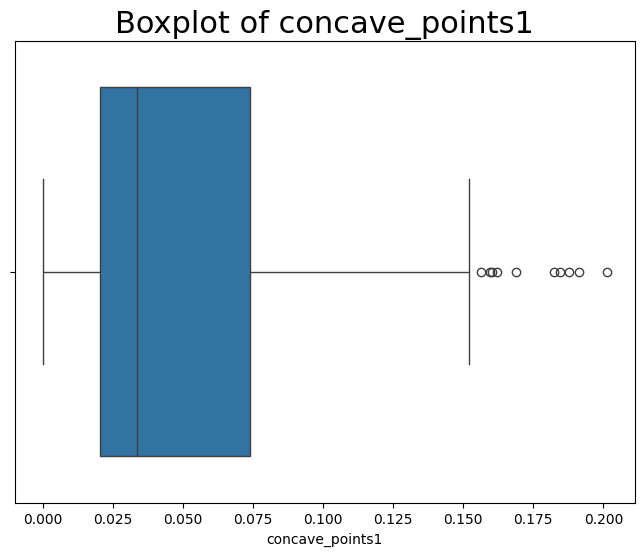

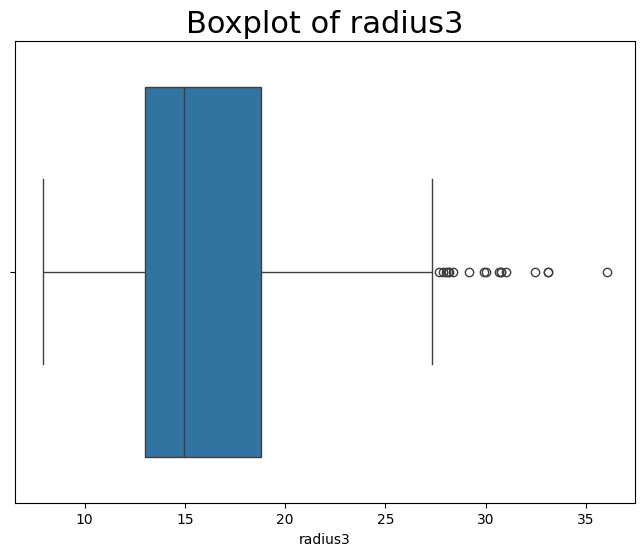

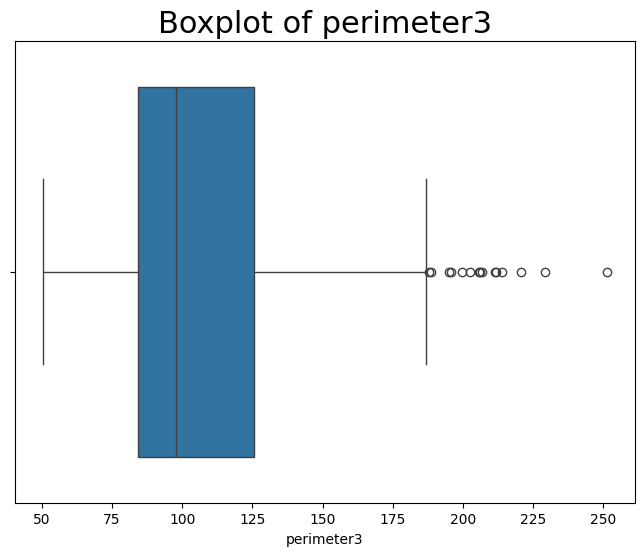

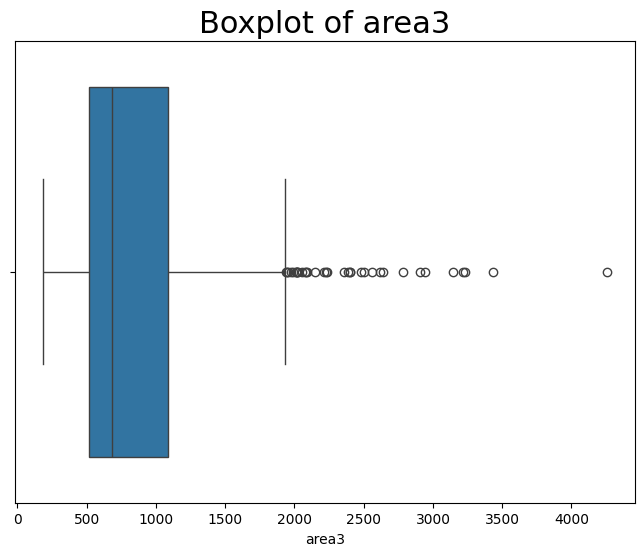

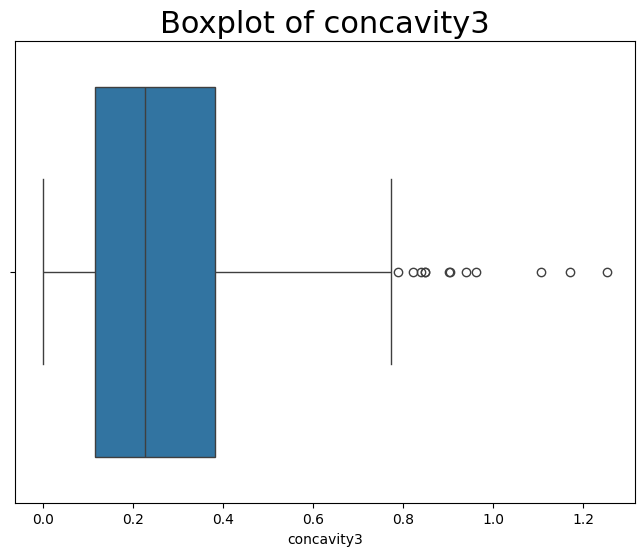

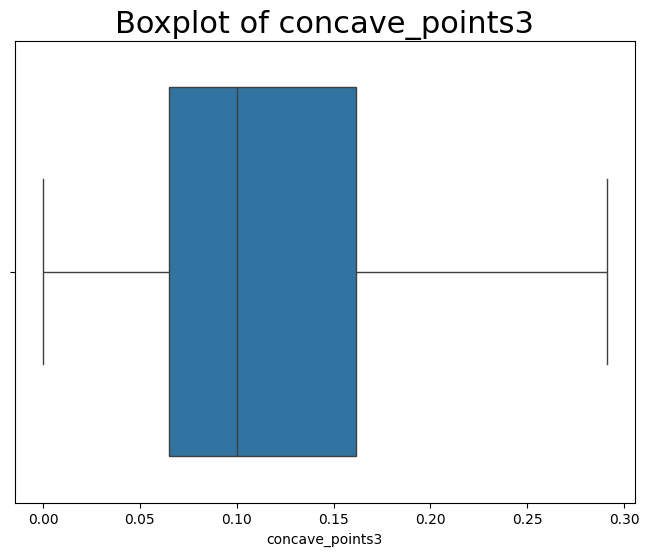

In [ ]:
# Plotting boxplots for each column except 'Diagnosis'
for column in df_final.columns:
    if column != 'Diagnosis':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_final[column])
        plt.title(f'Boxplot of {column}', fontsize=22)
        plt.show()

In [ ]:
# Create a copy of the DataFrame for scaling
df_scaled = df_final.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features (excluding 'Diagnosis')
numerical_cols = df_scaled.columns.difference(['Diagnosis'])
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Display the scaled DataFrame
print(df_scaled.head())

    radius1  perimeter1     area1  concavity1  concave_points1   radius3  \
0  0.521037    0.545989  0.363733    0.703140         0.731113  0.620776   
1  0.643144    0.615783  0.501591    0.203608         0.348757  0.606901   
2  0.601496    0.595743  0.449417    0.462512         0.635686  0.556386   
3  0.210090    0.233501  0.102906    0.565604         0.522863  0.248310   
4  0.629893    0.630986  0.489290    0.463918         0.518390  0.519744   

   perimeter3     area3  concavity3  concave_points3  Diagnosis  
0    0.668310  0.450698    0.568610         0.912027          1  
1    0.539818  0.435214    0.192971         0.639175          1  
2    0.508442  0.374508    0.359744         0.835052          1  
3    0.241347  0.094008    0.548642         0.884880          1  
4    0.506948  0.341575    0.319489         0.558419          1  


In [ ]:
df_scaled

,radius1,perimeter1,area1,concavity1,concave_points1,radius3,perimeter3,area3,concavity3,concave_points3,Diagnosis
0,0.521037,0.545989,0.363733,0.703140,0.731113,0.620776,0.668310,0.450698,0.568610,0.912027,1
1,0.643144,0.615783,0.501591,0.203608,0.348757,0.606901,0.539818,0.435214,0.192971,0.639175,1
2,0.601496,0.595743,0.449417,0.462512,0.635686,0.556386,0.508442,0.374508,0.359744,0.835052,1
3,0.210090,0.233501,0.102906,0.565604,0.522863,0.248310,0.241347,0.094008,0.548642,0.884880,1
4,0.629893,0.630986,0.489290,0.463918,0.518390,0.519744,0.506948,0.341575,0.319489,0.558419,1
...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.678668,0.566490,0.571462,0.690358,0.623266,0.576174,0.452664,0.328035,0.761512,1
565,0.622320,0.604036,0.474019,0.337395,0.486630,0.560655,0.520892,0.379915,0.256789,0.559450,1
566,0.455251,0.445788,0.303118,0.216753,0.263519,0.393099,0.379949,0.230731,0.271805,0.487285,1
567,0.644564,0.665538,0.475716,0.823336,0.755467,0.633582,0.668310,0.402035,0.749760,0.910653,1


In [ ]:
# Copy the DataFrame to avoid modifying the original data
df_cleaned = df_scaled.copy()

# Iterate through each column except 'Diagnosis'
for column in df_cleaned.columns:
    if column != 'Diagnosis':
        # Calculate Q1, Q3, and IQR
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median of the column
        median = df_cleaned[column].median()
        df_cleaned[column] = np.where((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), median, df_cleaned[column])

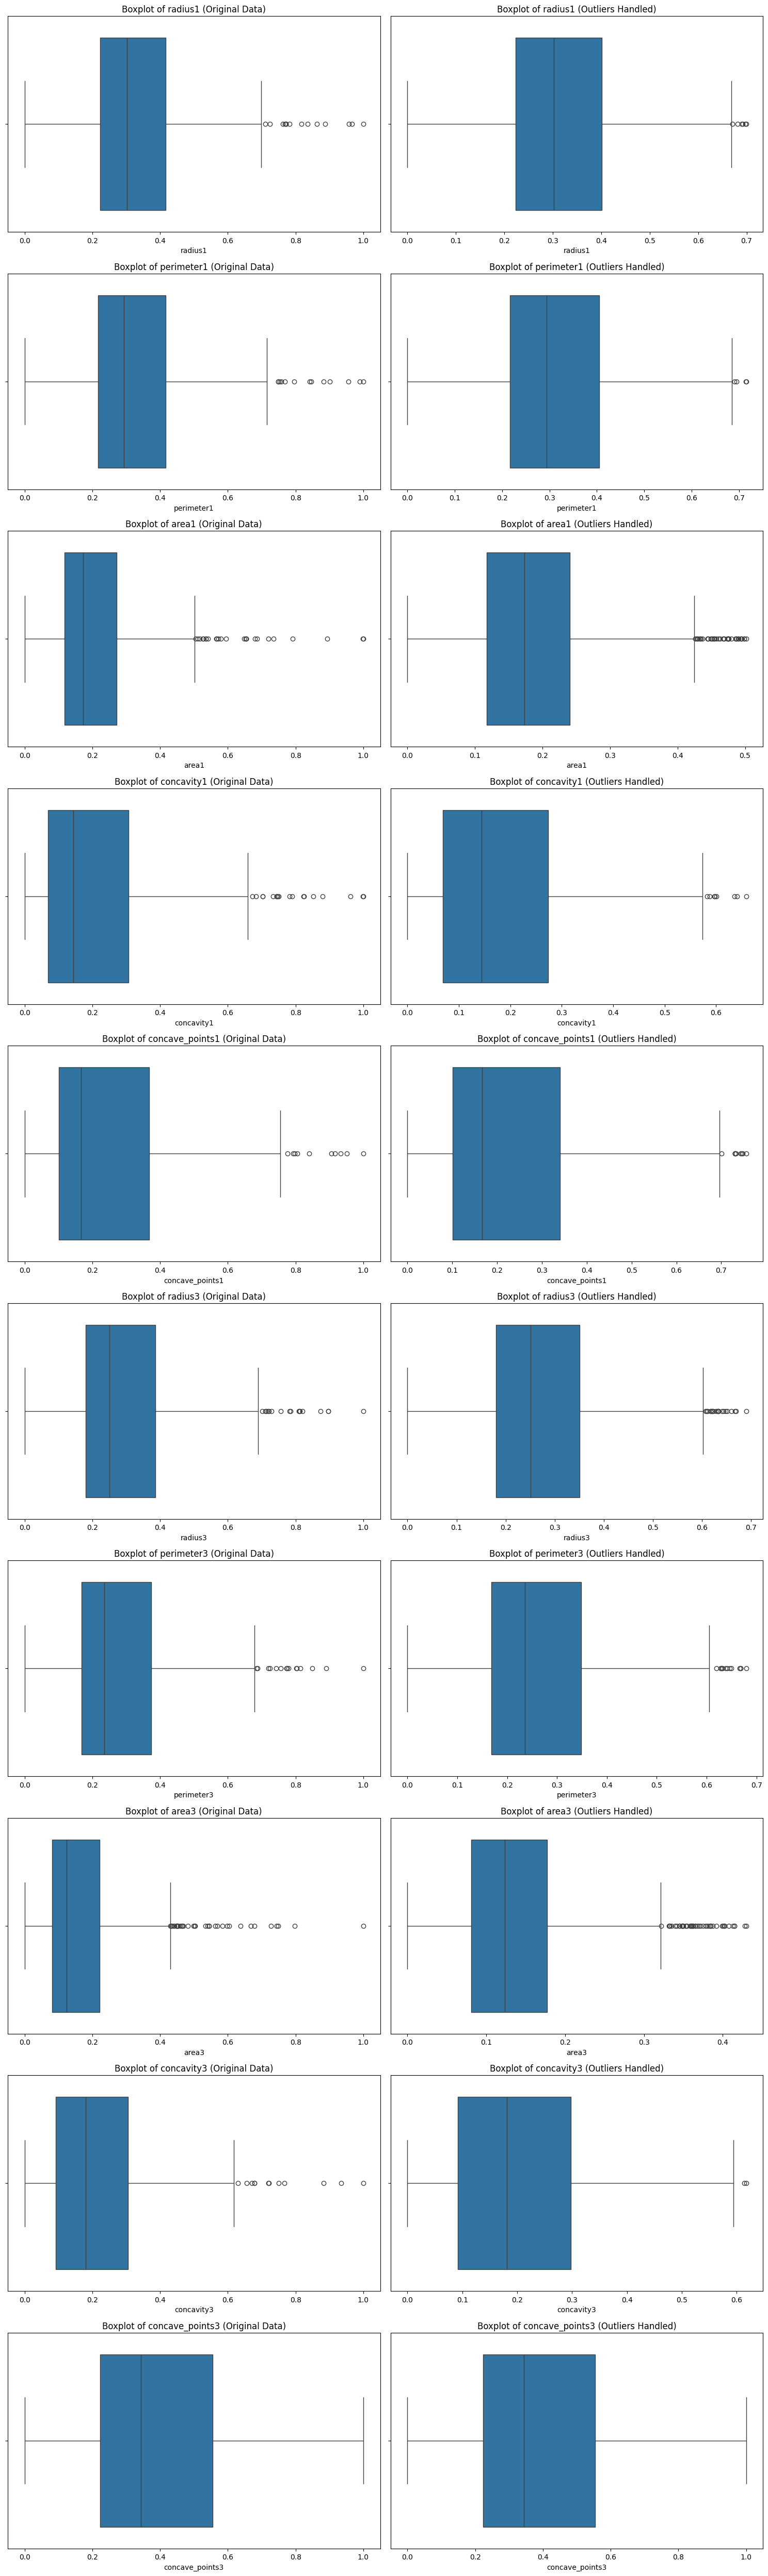

In [ ]:
# Create subplots for comparison
fig, axes = plt.subplots(nrows=len(df_scaled.columns) - 1, ncols=2, figsize=(15, 5 * (len(df_scaled.columns) - 1)))

# Iterate through columns and create boxplots
for i, column in enumerate(df_scaled.columns):
    if column != 'Diagnosis':
        # Original data boxplot
        sns.boxplot(x=df_scaled[column], ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {column} (Original Data)')

        # Outlier-handled data boxplot
        sns.boxplot(x=df_cleaned[column], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {column} (Outliers Handled)')

plt.tight_layout()
plt.show()

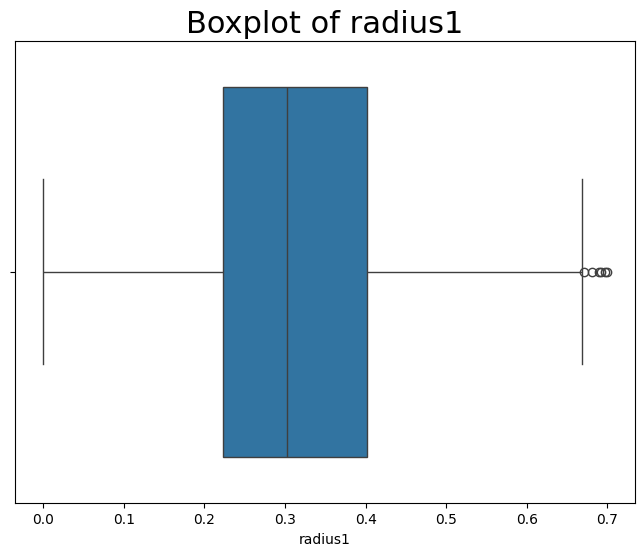

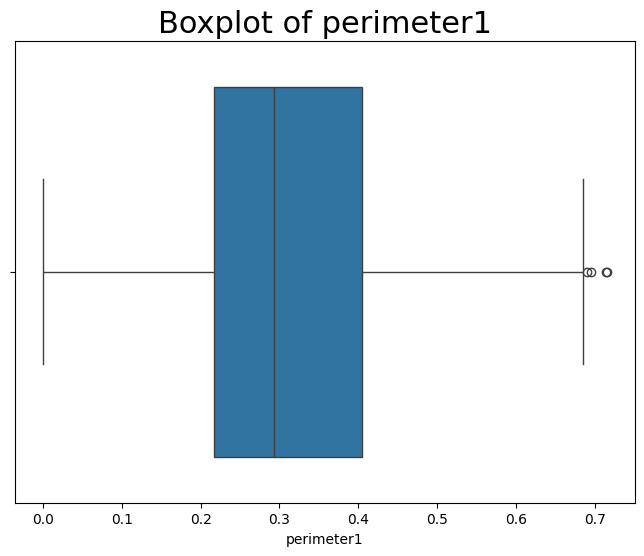

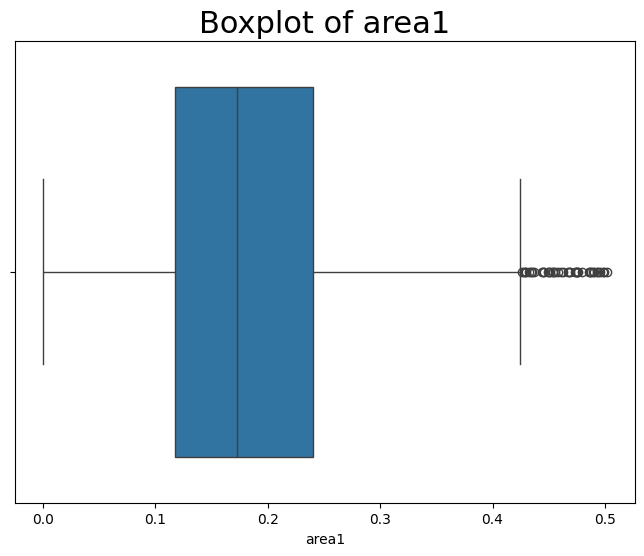

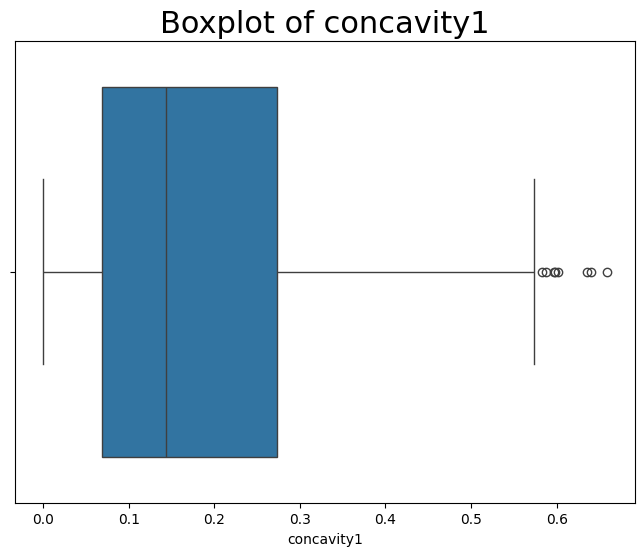

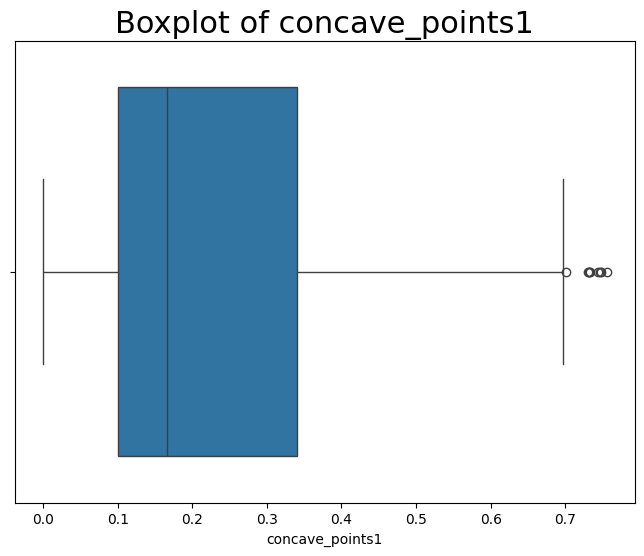

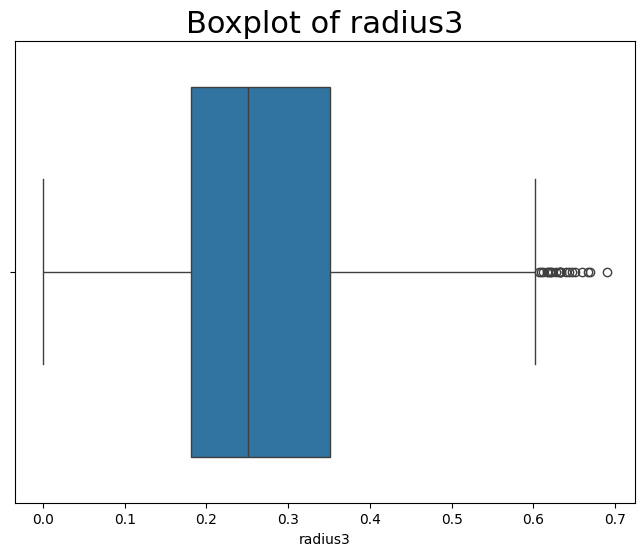

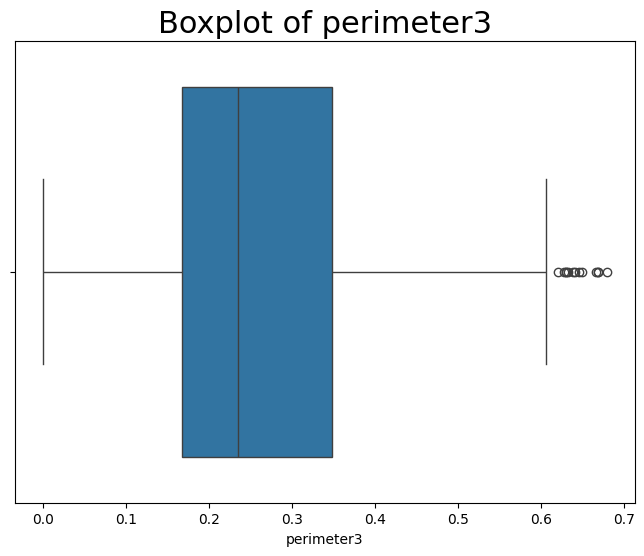

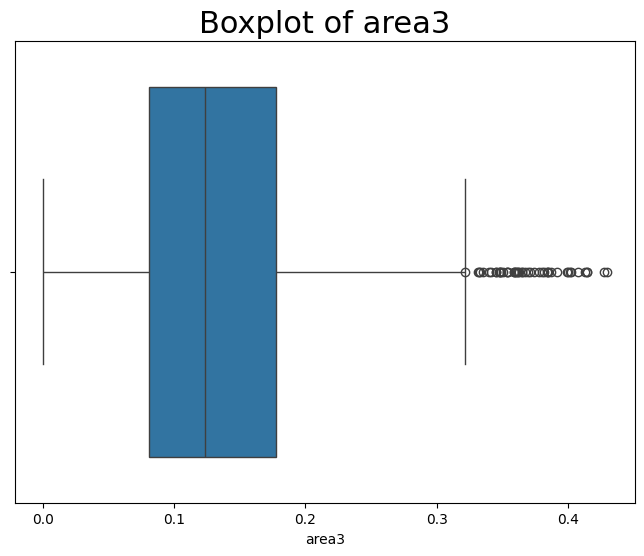

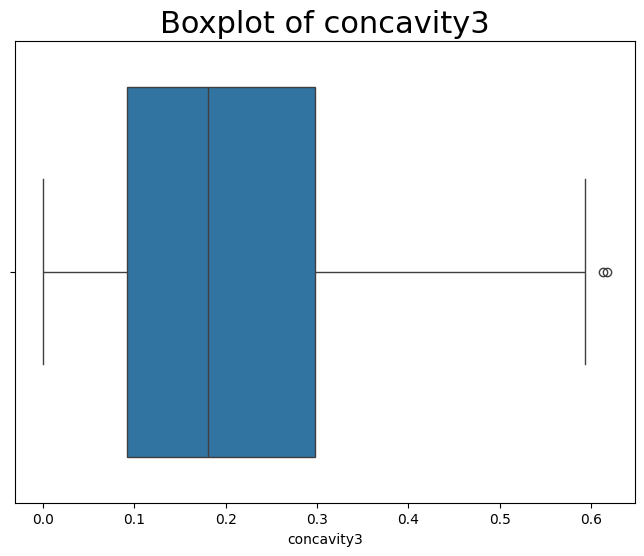

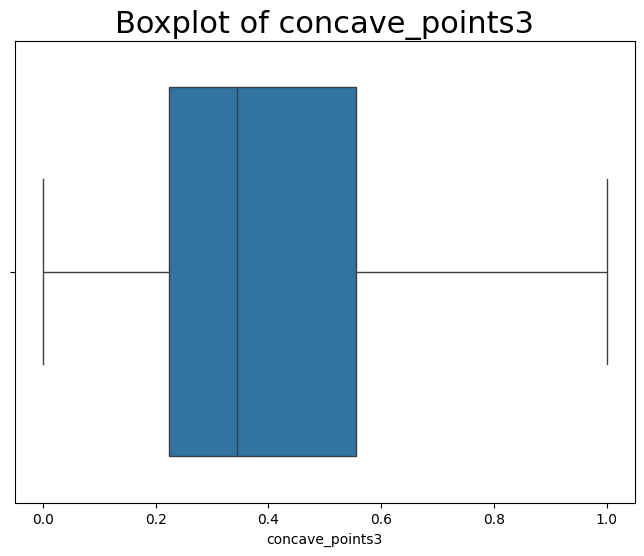

In [ ]:
# Plotting boxplots for each column except 'Diagnosis'(outliers handled)
for column in df_cleaned.columns:
    if column != 'Diagnosis':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Boxplot of {column}', fontsize=22)
        plt.show()

# Pelatihan Model KNN Beserta Metrik Evaluasi

In [ ]:
# Model 1 (Data original)

# Define features (X) and target (y)
X1 = df_final.drop('Diagnosis', axis=1)
y1 = df_final['Diagnosis']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier with k=5
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = knn_1.predict(X1_test)

# Evaluate the model
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



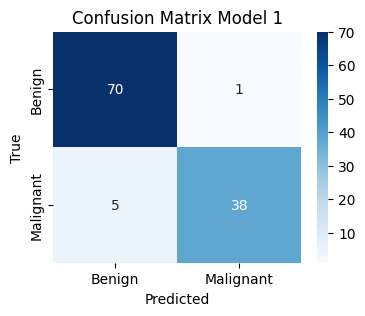

In [ ]:
# Compute the confusion matrix
cm1 = confusion_matrix(y1_test, y1_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 1')
plt.show()

In [ ]:
# Model 2 (Data setelah distandarisasi dan dibersihkan dari outlier)

# Define features (X) and target (y)
X2 = df_cleaned.drop('Diagnosis', axis=1)
y2 = df_cleaned['Diagnosis']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier with k=5
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = knn_2.predict(X2_test)

# Evaluate the model
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



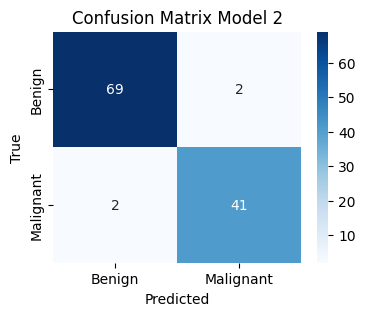

In [ ]:
# Compute the confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 2')
plt.show()

# Pelatihan Model KNN dengan Hyperparameter Tuning Beserta Metrik Evaluasi

In [ ]:
# Model HT 1 (Data Original)
# Define features (X) and target (y)
Xh1 = df_final.drop('Diagnosis', axis=1)
yh1 = df_final['Diagnosis']

# Split data into training and testing sets
Xh1_train, Xh1_test, yh1_train, yh1_test = train_test_split(Xh1, yh1, test_size=0.2, random_state=42)
# Create a KNN classifier
knn_ht1 = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid1= {
    'n_neighbors': [3, 5, 7, 9],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Try different weighting methods
    'metric': [ 'euclidean','manhattan']  # Try different distance metrics
}

# Create a GridSearchCV object
grid_search_1 = GridSearchCV(estimator=knn_ht1, param_grid=param_grid1, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_1.fit(Xh1_train, yh1_train)

# Evaluate the best model on the test set
yh1_pred = grid_search_1.predict(Xh1_test)
print(classification_report(yh1_test, yh1_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_1.best_params_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
# Print the accuracy scores for all hyperparameter combinations
results1 = pd.DataFrame(grid_search_1.cv_results_)
results1[['param_n_neighbors','param_metric', 'param_weights','mean_test_score']]

,param_n_neighbors,param_metric,param_weights,mean_test_score
0,3,euclidean,uniform,0.918681
1,3,euclidean,distance,0.918681
2,5,euclidean,uniform,0.914286
3,5,euclidean,distance,0.912088
4,7,euclidean,uniform,0.923077
5,7,euclidean,distance,0.916484
6,9,euclidean,uniform,0.925275
7,9,euclidean,distance,0.927473
8,3,manhattan,uniform,0.916484
9,3,manhattan,distance,0.914286


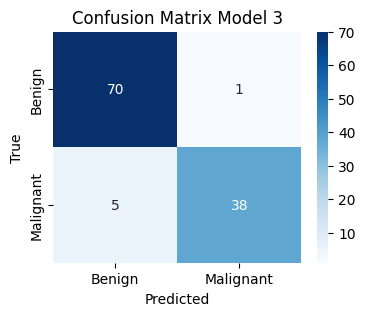

In [ ]:
# Compute the confusion matrix
cm3 = confusion_matrix(yh1_test, yh1_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 3')
plt.show()

In [ ]:
# Model HT 2 (Data setelah distandarisasi dan dibersihkan dari outlier)
# Define features (X) and target (y)
Xh2 = df_cleaned.drop('Diagnosis', axis=1)
yh2 = df_cleaned['Diagnosis']

# Split data into training and testing sets
Xh2_train, Xh2_test, yh2_train, yh2_test = train_test_split(Xh2, yh2, test_size=0.2, random_state=42)
# Create a KNN classifier
knn_ht2 = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Try different weighting methods
    'metric': [ 'euclidean','manhattan']  # Try different distance metrics
}

# Create a GridSearchCV object
grid_search_2 = GridSearchCV(estimator=knn_ht2, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_2.fit(Xh2_train, yh2_train)

# Evaluate the best model on the test set
yh2_pred = grid_search_2.predict(Xh2_test)
print(classification_report(yh2_test, yh2_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_2.best_params_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
# Print the accuracy scores for all hyperparameter combinations
results2 = pd.DataFrame(grid_search_2.cv_results_)
results2[['param_n_neighbors','param_metric', 'param_weights','mean_test_score']]

,param_n_neighbors,param_metric,param_weights,mean_test_score
0,3,euclidean,uniform,0.936264
1,3,euclidean,distance,0.936264
2,5,euclidean,uniform,0.929670
3,5,euclidean,distance,0.927473
4,7,euclidean,uniform,0.925275
5,7,euclidean,distance,0.929670
6,9,euclidean,uniform,0.923077
7,9,euclidean,distance,0.929670
8,3,manhattan,uniform,0.947253
9,3,manhattan,distance,0.945055


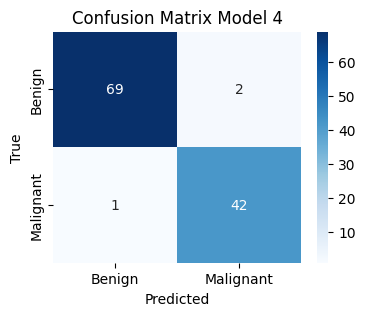

In [ ]:
# Compute the confusion matrix
cm4 = confusion_matrix(yh2_test, yh2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model 4')
plt.show()